# SOLDIER RACE PROJECT

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.

For Further Information:https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf



# Exploratory Data Analysis

## Import Libraries

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.ensemble import RandomForestClassifier
from scikitplot.metrics import plot_roc, precision_recall_curve  # !pip install scikit-plot
from scikitplot.metrics import plot_precision_recall

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_rows', 50)    # pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 50) # pd.set_option('display.max_columns', None)
pd.set_option('display.width', 400)      # pd.set_option('display.width', 100)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% ! important; }<style>"))

C:\Users\cansi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\cansi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\cansi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Get Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr', encoding='latin-1')

In [3]:
df_female= pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')

# EDA

In [4]:
df_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,...,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,...,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,...,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,...,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,...,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,...,1090,1679,467,303,868,214,379,1245,946,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [5]:
df_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,...,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,...,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,...,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,...,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,...,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,...,800,1698,452,405,1163,300,380,911,886,152,762,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [6]:
print(df_male.shape)
print(df_female.shape)

(4082, 108)
(1986, 108)


In [7]:
data = pd.concat([df_male,df_female], axis=0, ignore_index=True)
data.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,...,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,...,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,...,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,...,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,...,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,...,1679,467,303,868,214,379,1245,946,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN


In [8]:
data.shape

(6068, 109)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 109 entries, subjectid to SubjectId
dtypes: float64(2), int64(98), object(9)
memory usage: 5.0+ MB


In [10]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [11]:
data.isnull().sum().any()

True

In [12]:
(data.isnull().sum() > 0).sum()

3

In [13]:
data.duplicated().sum()

0

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


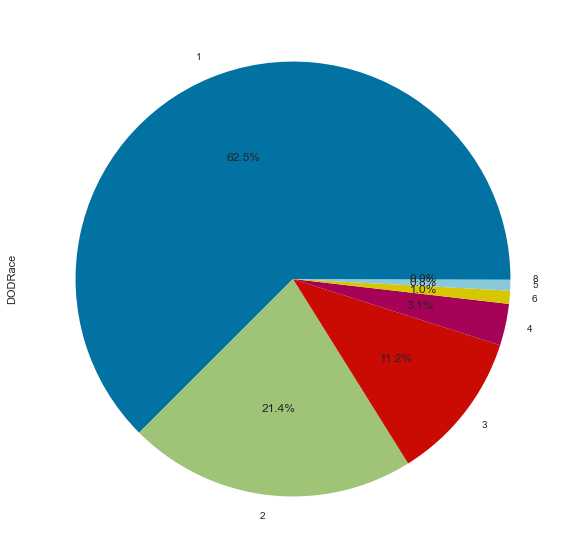

In [14]:
print(data["DODRace"].value_counts())
data["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

In [15]:
drop_list =[]
for col in data:
  if data[col].isnull().sum()>1800:
    print(f"{col} = {data[col].isnull().sum()}")
    drop_list.append(col)
drop_list 

subjectid = 1986
Ethnicity = 4647
SubjectId = 4082


['subjectid', 'Ethnicity', 'SubjectId']

In [16]:
data.drop(drop_list, axis=1, inplace=True)

In [17]:
data.isnull().sum().any()

False

In [18]:
data.shape

(6068, 106)

In [19]:
for col in data.select_dtypes("object"):
  print(f"{col} {data[col].nunique()}")

Gender 2
Date 253
Installation 12
Component 3
Branch 3
PrimaryMOS 285
SubjectsBirthLocation 152
WritingPreference 3


In [20]:
data.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [21]:
data["DODRace"] = data.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [22]:
data.groupby(["Component"])["DODRace"].value_counts(normalize=True)

Component            DODRace         
Army National Guard  White              0.685
                     Black              0.184
                     Hispanic           0.093
                     Asian              0.022
                     Native American    0.009
                     Pacific Islander   0.006
Army Reserve         White              0.518
                     Black              0.236
                     Hispanic           0.186
                     Asian              0.041
                     Pacific Islander   0.014
                     Native American    0.005
Regular Army         White              0.581
                     Black              0.238
                     Hispanic           0.123
                     Asian              0.038
                     Pacific Islander   0.012
                     Native American    0.008
                     Other              0.001
Name: DODRace, dtype: float64

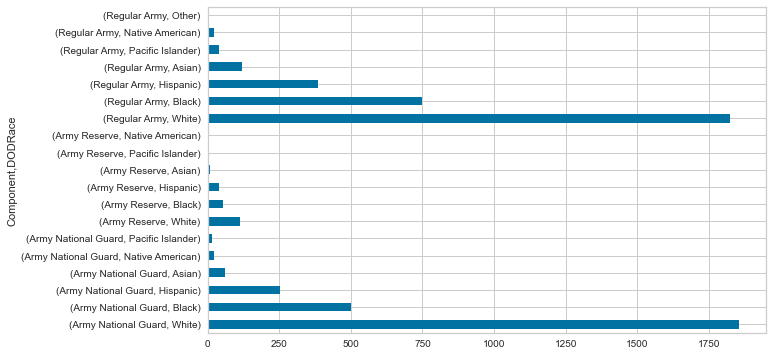

In [23]:
data.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh");

In [24]:
data.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True) #.iplot(kind="barh")

Component            Branch          DODRace         
Army National Guard  Combat Arms     White              0.772
                                     Black              0.098
                                     Hispanic           0.092
                                     Asian              0.022
                                     Native American    0.011
                                                         ... 
Regular Army         Combat Support  Black              0.318
                                     Hispanic           0.102
                                     Asian              0.044
                                     Pacific Islander   0.021
                                     Native American    0.004
Name: DODRace, Length: 51, dtype: float64

In [25]:
drop_list1 = ["Date", "Installation", "Component", "Branch", "PrimaryMOS","Weightlbs", "Heightin"]
data.drop(drop_list1, axis=1, inplace=True)

In [26]:
data.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength',
       'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength'

In [27]:
data.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
5          18
18         18
25         14
351        10
38          9
64          8
62          8
35          8
42          7
63          7
231         6
43          5
235         4
218         3
651         2
2351        2
318         2
641         2
451         2
423         2
431         2
2518        2
48          1
631         1
4251        1
428         1
238         1
358         1
425         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [28]:
data.drop("SubjectNumericRace",axis=1,inplace=True)

In [29]:
data.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [30]:
data = data[(data["DODRace"] == "White") | (data["DODRace"] == "Black") | (data["DODRace"] == "Hispanic")]
data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,...,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,...,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,...,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,...,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,...,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,...,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,1089,255,856,652,541,373,1457,290,1082,293,...,1716,1687,1391,1119,660,155,749,446,136,872,1706,447,334,1043,265,370,1002,832,162,836,Female,Texas,Hispanic,51,Right hand
6064,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,145,1016,246,818,572,464,375,1390,291,1016,269,...,1620,1613,1316,1043,616,157,721,422,131,838,1648,446,334,971,243,374,958,717,157,804,Female,Texas,Hispanic,40,Right hand
6065,260,1334,318,213,1259,234,183,363,332,299,460,70,317,311,139,1063,262,846,637,525,370,1412,285,1093,286,...,1740,1644,1337,1054,640,159,758,449,127,862,1590,444,335,982,254,351,970,762,159,774,Female,Texas,Black,40,Right hand
6066,205,1293,302,199,1207,213,163,376,276,280,426,62,282,267,137,1051,225,786,582,480,370,1377,270,922,243,...,1628,1616,1288,1028,623,163,725,419,135,802,1525,450,298,837,208,335,952,632,146,769,Female,Texas,Hispanic,31,Right hand


In [31]:
data.reset_index(drop=True, inplace=True)

In [32]:
data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,...,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,...,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,...,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,...,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,...,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,...,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,1089,255,856,652,541,373,1457,290,1082,293,...,1716,1687,1391,1119,660,155,749,446,136,872,1706,447,334,1043,265,370,1002,832,162,836,Female,Texas,Hispanic,51,Right hand
5765,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,145,1016,246,818,572,464,375,1390,291,1016,269,...,1620,1613,1316,1043,616,157,721,422,131,838,1648,446,334,971,243,374,958,717,157,804,Female,Texas,Hispanic,40,Right hand
5766,260,1334,318,213,1259,234,183,363,332,299,460,70,317,311,139,1063,262,846,637,525,370,1412,285,1093,286,...,1740,1644,1337,1054,640,159,758,449,127,862,1590,444,335,982,254,351,970,762,159,774,Female,Texas,Black,40,Right hand
5767,205,1293,302,199,1207,213,163,376,276,280,426,62,282,267,137,1051,225,786,582,480,370,1377,270,922,243,...,1628,1616,1288,1028,623,163,725,419,135,802,1525,450,298,837,208,335,952,632,146,769,Female,Texas,Hispanic,31,Right hand


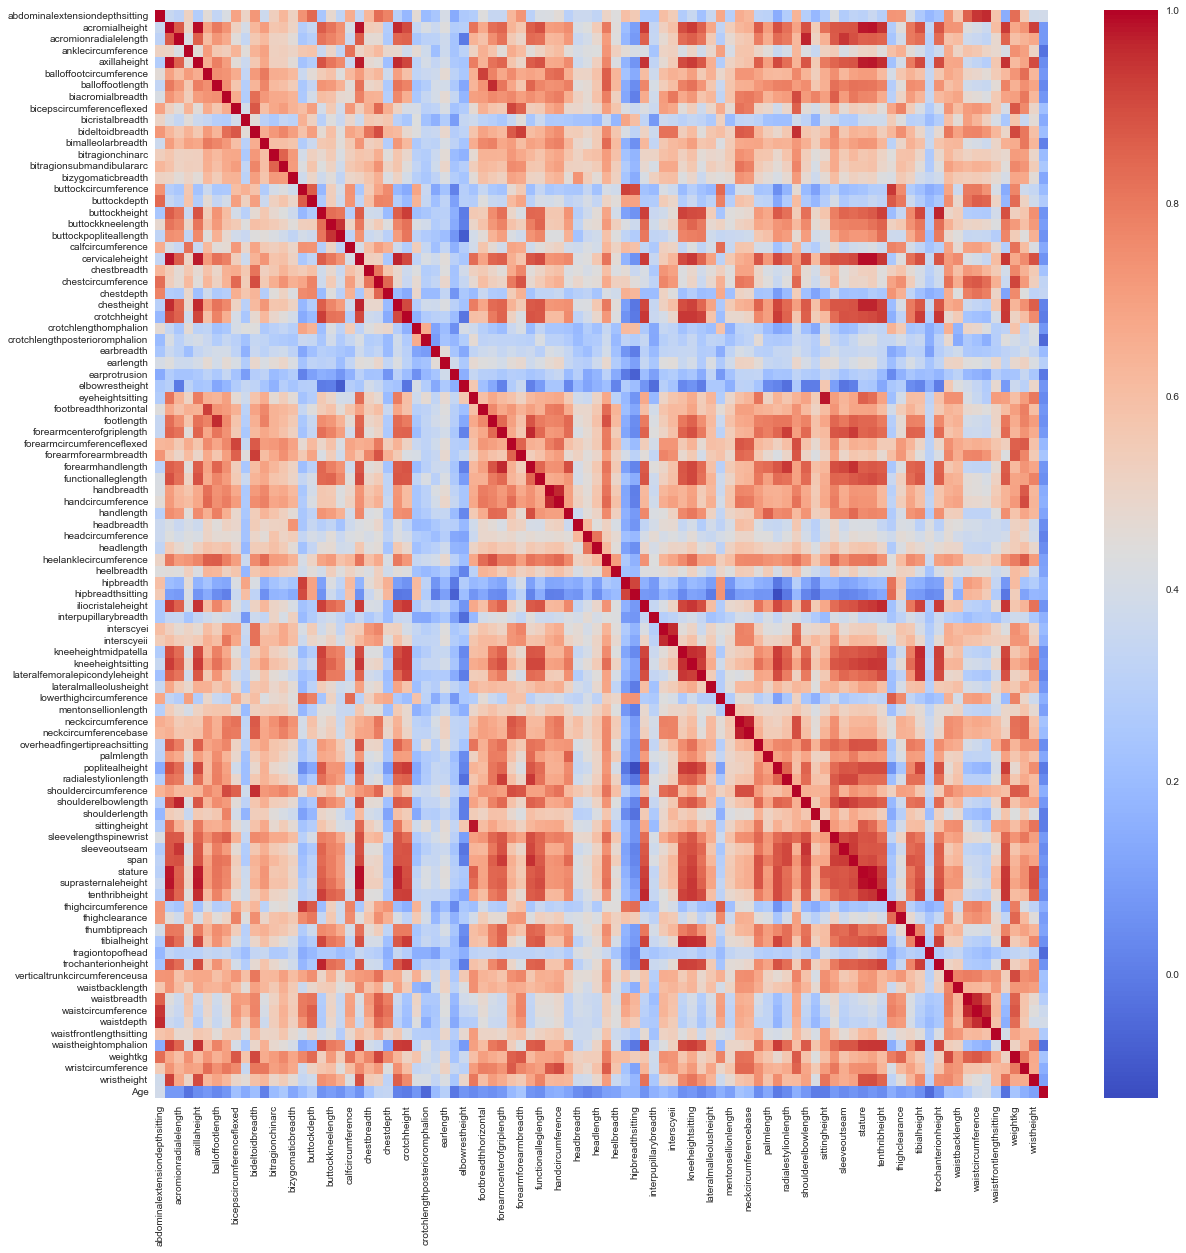

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap ="coolwarm");

# DATA Preprocessing

### Train Test Split

In [34]:
X = data.drop("DODRace",axis=1)
y = data.DODRace

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=101)

In [36]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [37]:
y_test.value_counts()
# 3792/758 = 5
# 1298/ 260 = 5
# 679/136 = 5

White       758
Black       260
Hispanic    136
Name: DODRace, dtype: int64

### Encode

In [38]:
cat = X.select_dtypes("object").columns
cat 

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [39]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=MinMaxScaler())
column_trans

ColumnTransformer(remainder=MinMaxScaler(),
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])

# Modelling

In [40]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [41]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

## 1. Logistic model

In [42]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced', max_iter=10000))]
pipe_log_model = Pipeline(steps=operations)
pipe_log_model.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000))])

In [43]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  456   67]
 [  56  363 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



### Logistic Model Cross Validation

In [44]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced', max_iter=10000))]
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.599
train_f1_Hispanic          0.652
test_precision_Hispanic    0.490
train_precision_Hispanic   0.533
test_recall_Hispanic       0.773
train_recall_Hispanic      0.839
dtype: float64

In [45]:
df_scores.iloc[:,2:]

,test_f1_Hispanic,train_f1_Hispanic,test_precision_Hispanic,train_precision_Hispanic,test_recall_Hispanic,train_recall_Hispanic
1,0.585,0.658,0.467,0.541,0.782,0.840
2,0.609,0.649,0.479,0.532,0.836,0.832
3,0.656,0.641,0.566,0.522,0.782,0.832
4,0.590,0.649,0.482,0.529,0.759,0.840
5,0.614,0.649,0.500,0.533,0.796,0.830
6,0.573,0.660,0.461,0.543,0.759,0.840
7,0.593,0.659,0.473,0.541,0.796,0.843
8,0.576,0.656,0.487,0.536,0.704,0.845
9,0.604,0.643,0.494,0.522,0.778,0.838
10,0.593,0.655,0.494,0.534,0.741,0.847


### Logistic Model GridsearchCV

In [46]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [47]:
param_grid = {"log__C": [1, 5, 10,15,20], 'log__penalty': ["l1", "l2"], 'log__solver': ['liblinear', 'lbfgs']}

In [48]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000))]
model = Pipeline(steps=operations)
log_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring=recall_Hispanic, n_jobs=-1, cv=5)
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 5, 10, 15, 20],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [49]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [50]:
log_model_grid.best_score_

0.7716106014271152

In [51]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[239  14   7]
 [  5 111  20]
 [ 25  89 644]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   37   30]
 [  20  456   67]
 [  56  363 2615]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



### Logistic Model Precision-Recall Curve

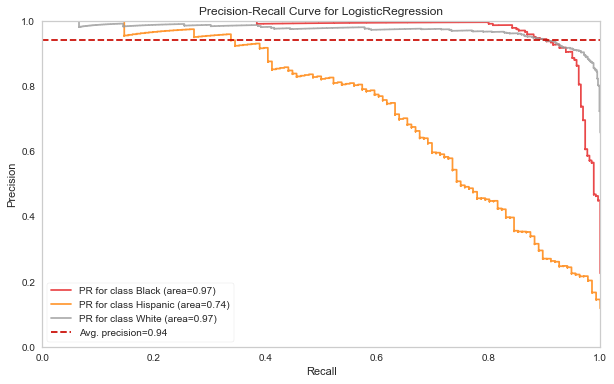

In [52]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000, C=10))]
model = Pipeline(steps=operations)
viz = PrecisionRecallCurve(model, per_class=True, classes= ["Black", "Hispanic", "White"], cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();
#viz.score_ #["Hispanic"]

In [53]:
y_pred = log_model_grid.predict(X_test)
log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

### Lojistic Regression solver "liblinear" and penalty="l1"

We tried some combination and decided this hyperparameters here because it generalize the model better. If customer ask for a model which generalizes data better. We can offer this model.
Because in documentation of Logistic Regression states that liblinear is good for small datasets

In [54]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000, solver="liblinear", penalty="l1"))]
pipe_log_model_libl = Pipeline(steps=operations)
pipe_log_model_libl.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', solver='liblinear'))])

In [55]:
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[245   4  11]
 [  5  96  35]
 [ 18  33 707]]
              precision    recall  f1-score   support

       Black       0.91      0.94      0.93       260
    Hispanic       0.72      0.71      0.71       136
       White       0.94      0.93      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.86      0.86      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 975   19   44]
 [  29  386  128]
 [  43  146 2845]]
              precision    recall  f1-score   support

       Black       0.93      0.94      0.94      1038
    Hispanic       0.70      0.71      0.71       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



In [56]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000, solver="liblinear", penalty="l1"))]
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.657
train_f1_Hispanic          0.702
test_precision_Hispanic    0.666
train_precision_Hispanic   0.699
test_recall_Hispanic       0.648
train_recall_Hispanic      0.705
dtype: float64

## 2. SVC

### Vanilla SVC model 

In [57]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced"))]
pipe_svc_model = Pipeline(steps=operations_svc)
pipe_svc_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('svc', SVC(class_weight='balanced'))])

In [58]:
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[240  12   8]
 [  5 111  20]
 [ 20 109 629]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.91       260
    Hispanic       0.48      0.82      0.60       136
       White       0.96      0.83      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.86      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 956   42   40]
 [  23  456   64]
 [  54  426 2554]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92      1038
    Hispanic       0.49      0.84      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.81      4615
weighted avg       0.90      0.86      0.87      4615



In [59]:
model = Pipeline(steps=operations_svc)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.568
train_f1_Hispanic          0.621
test_precision_Hispanic    0.453
train_precision_Hispanic   0.495
test_recall_Hispanic       0.762
train_recall_Hispanic      0.834
dtype: float64

###  SVC Model GridsearchCV

In [60]:
param_grid = {'svc__C': [1,2],'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]}

In [61]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)
svm_model_grid = GridSearchCV(model, param_grid, verbose=3, scoring=recall_Hispanic, n_jobs=-1, cv=5)
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [62]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

In [63]:
svm_model_grid.best_score_

0.764186204553177

In [64]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[240  10  10]
 [  5 111  20]
 [ 22  94 642]]
              precision    recall  f1-score   support

       Black       0.90      0.92      0.91       260
    Hispanic       0.52      0.82      0.63       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 970   35   33]
 [  16  466   61]
 [  52  373 2609]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.53      0.86      0.66       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



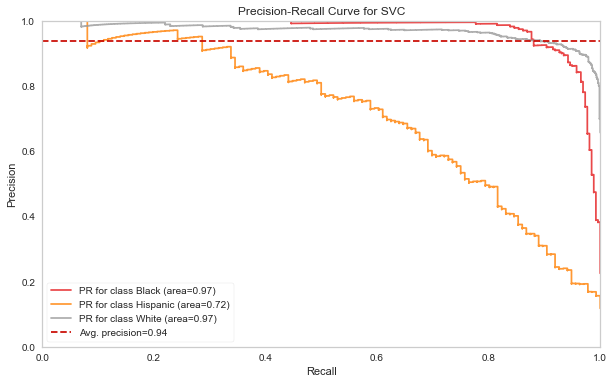

In [65]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)
viz = PrecisionRecallCurve(model, per_class=True, classes= ["Black", "Hispanic", "White"], cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [66]:
y_pred = svm_model_grid.predict(X_test)
svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Encode

In [67]:
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [68]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

### RF Model

In [69]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced"))]
pipe_model_rf = Pipeline(steps=operations_rf)
pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model', RandomForestClassifier(class_weight='balanced'))])

In [70]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[183   1  76]
 [ 11   7 118]
 [  8   2 748]]
              precision    recall  f1-score   support

       Black       0.91      0.70      0.79       260
    Hispanic       0.70      0.05      0.10       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.80      0.58      0.59      1154
weighted avg       0.81      0.81      0.77      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [71]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced"))]
model = Pipeline(steps=operations_rf)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5,return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.070
train_f1_Hispanic          1.000
test_precision_Hispanic    0.852
train_precision_Hispanic   1.000
test_recall_Hispanic       0.037
train_recall_Hispanic      1.000
dtype: float64

### RF Model GridsearchCV

In [72]:
param_grid = {'RF_model__n_estimators':[400,500], 'RF_model__max_depth':[2,3]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]

In [73]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced"))]
model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model, param_grid, verbose=3, scoring=recall_Hispanic, n_jobs=-1)

In [74]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [75]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=500))])

In [76]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 500}

In [77]:
rf_grid_model.best_score_

0.6132687733605164

In [78]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[172  54  34]
 [ 17  73  46]
 [ 96 252 410]]
              precision    recall  f1-score   support

       Black       0.60      0.66      0.63       260
    Hispanic       0.19      0.54      0.28       136
       White       0.84      0.54      0.66       758

    accuracy                           0.57      1154
   macro avg       0.54      0.58      0.52      1154
weighted avg       0.71      0.57      0.61      1154


Train_Set
[[ 699  207  132]
 [  48  354  141]
 [ 252 1137 1645]]
              precision    recall  f1-score   support

       Black       0.70      0.67      0.69      1038
    Hispanic       0.21      0.65      0.32       543
       White       0.86      0.54      0.66      3034

    accuracy                           0.58      4615
   macro avg       0.59      0.62      0.56      4615
weighted avg       0.75      0.58      0.63      4615



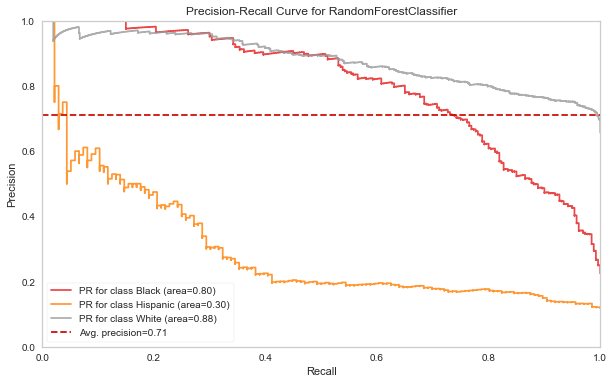

In [79]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", max_depth=2, n_estimators=400))]
model = Pipeline(steps=operations_rf)
viz = PrecisionRecallCurve(model, per_class=True, classes= ["Black", "Hispanic", "White"], cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [80]:
y_pred = rf_grid_model.predict(X_test)
rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### XGBoost Model

In [81]:
import xgboost as xgb
xgb.__version__

'1.4.2'

In [82]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]
pipe_model_xgb = Pipeline(steps=operations_xgb)
pipe_model_xgb.fit(X_train, y_train)

[14:30:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_byno...
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1,
                               objective='multi:softprob', random_state=101,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [83]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([2.8330264 , 0.50703142, 0.50703142, ..., 0.50703142, 1.4820167 ,
       0.50703142])

In [84]:
comp = pd.DataFrame(classes_weights)
comp.head(20)

,0
0,2.833
1,0.507
2,0.507
3,0.507
4,1.482
5,0.507
6,0.507
7,1.482
8,1.482
9,0.507


In [85]:
comp["label"] = y_train.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0    
Black     1.482    1038
Hispanic  2.833     543
White     0.507    3034
Name: 0, dtype: int64

In [86]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

[14:30:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_byno...
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1,
                               objective='multi:softprob', random_state=101,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [87]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

Test_Set
[[231   2  27]
 [ 11  64  61]
 [ 21  20 717]]
              precision    recall  f1-score   support

       Black       0.88      0.89      0.88       260
    Hispanic       0.74      0.47      0.58       136
       White       0.89      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.84      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [88]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier())]
model = Pipeline(steps=operations_xgb)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5, fit_params={"XGB_model__sample_weight":classes_weights}, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

[14:30:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

test_f1_Hispanic           0.528
train_f1_Hispanic          1.000
test_precision_Hispanic    0.695
train_precision_Hispanic   1.000
test_recall_Hispanic       0.427
train_recall_Hispanic      1.000
dtype: float64

### XGBoost Model GridsearchCV

In [89]:
param_grid = {"XGB_model__n_estimators":[50, 100], 'XGB_model__max_depth':[1,3,5,7], "XGB_model__learning_rate": [0.1, 0.3],
              "XGB_model__subsample":[0.8, 1], "XGB_model__colsample_bytree":[0.8, 1]}

In [90]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier())]
model = Pipeline(steps=operations_xgb)
xgb_grid_model = GridSearchCV(model, param_grid, scoring=recall_Hispanic, n_jobs = -1, verbose = 2).fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[14:33:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [91]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_byno...
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.3,
                               max_delta_step=0, max_depth=1,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [92]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.3,
 'XGB_model__max_depth': 1,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 0.8}

In [93]:
xgb_grid_model.best_score_

0.635406048250085

In [94]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[221  25  14]
 [ 11  87  38]
 [ 51 142 565]]
              precision    recall  f1-score   support

       Black       0.78      0.85      0.81       260
    Hispanic       0.34      0.64      0.45       136
       White       0.92      0.75      0.82       758

    accuracy                           0.76      1154
   macro avg       0.68      0.75      0.69      1154
weighted avg       0.82      0.76      0.78      1154


Train_Set
[[ 909   68   61]
 [  42  401  100]
 [ 139  546 2349]]
              precision    recall  f1-score   support

       Black       0.83      0.88      0.85      1038
    Hispanic       0.40      0.74      0.51       543
       White       0.94      0.77      0.85      3034

    accuracy                           0.79      4615
   macro avg       0.72      0.80      0.74      4615
weighted avg       0.85      0.79      0.81      4615



In [95]:
#!pip install scikit-plot

In [96]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(learning_rate=0.3, max_depth=1, subsample=0.8))]
model = Pipeline(steps=operations_xgb)
model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

[14:33:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_byno...
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.3,
                               max_delta_step=0, max_depth=1,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

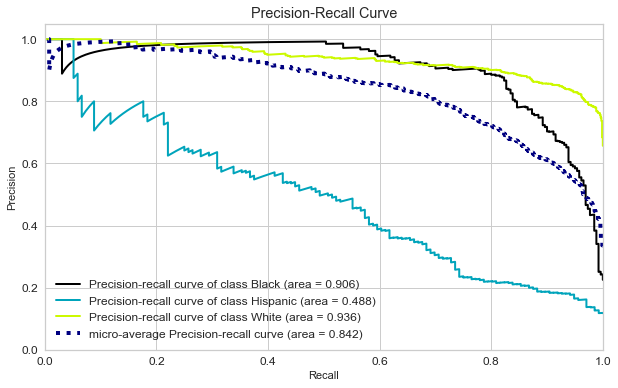

In [97]:
y_pred_proba = model.predict_proba(X_test)
#y_pred = model.predict(X_test)
#Plot metrics 
#plot_roc(y_test, y_score)
#plt.show()
plot_precision_recall(y_test, y_pred_proba)
plt.show()

In [98]:
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.4880378968213562

In [99]:
y_pred = xgb_grid_model.predict(X_test)
xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## Comparing Models

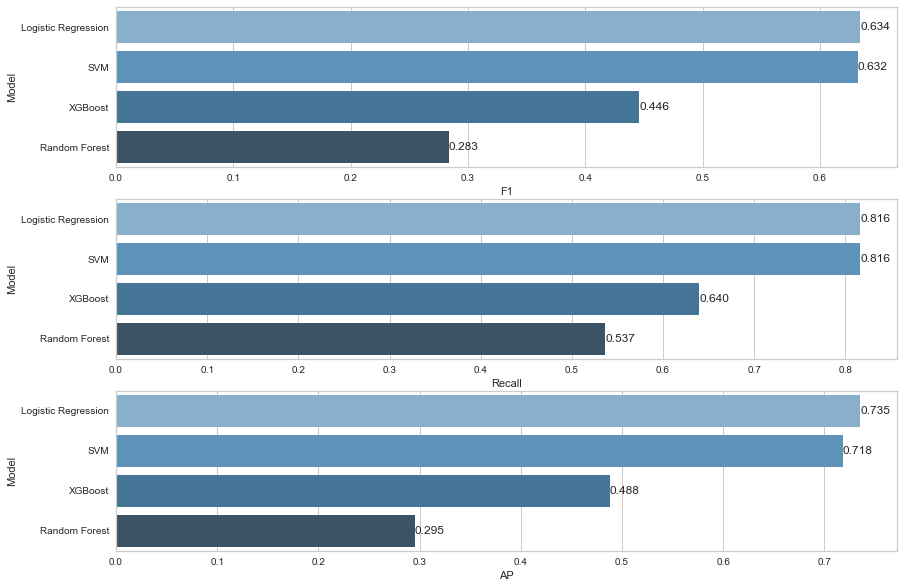

In [100]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# Before the Deployment 
Let's choose the model that works best based on chosen metric

### Encode

In [101]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=MinMaxScaler())

In [102]:
operations_final = [("OneHotEncoder",column_trans_final),("log", LogisticRegression(class_weight='balanced',max_iter=10000))]
final_model = Pipeline(steps=operations_final)
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000))])

In [103]:
X.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,...,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age
count,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,...,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000,5769.000
mean,247.254,1408.630,328.072,225.202,1301.903,244.408,195.119,399.706,341.663,274.903,491.455,72.335,324.962,306.678,139.529,1022.059,242.234,872.113,610.450,498.332,386.317,1479.952,283.233,1024.207,252.323,...,145.202,898.592,868.361,578.013,1766.951,1716.939,1405.392,1101.631,623.584,176.696,791.045,459.389,129.580,884.659,1632.471,460.990,318.410,916.817,230.459,377.352,1033.591,800.981,169.308,831.335,29.776
std,37.458,78.303,20.445,15.966,71.261,16.804,13.379,30.124,41.271,19.240,42.012,5.327,17.050,20.819,7.249,75.953,26.409,54.065,33.121,28.513,30.578,83.591,20.612,100.376,26.660,...,12.395,45.257,56.904,37.905,109.925,89.256,78.009,59.787,57.530,16.124,53.487,29.275,6.636,53.766,98.204,36.706,36.396,114.386,35.692,31.714,61.958,155.990,13.061,47.322,8.707
min,155.000,1146.000,249.000,156.000,1062.000,186.000,151.000,283.000,216.000,197.000,357.000,55.000,267.000,245.000,116.000,737.000,168.000,656.000,479.000,380.000,266.000,1208.000,213.000,695.000,170.000,...,107.000,750.000,636.000,410.000,1323.000,1442.000,1150.000,874.000,412.000,121.000,602.000,347.000,105.000,660.000,1342.000,345.000,211.000,611.000,138.000,289.000,808.000,358.000,124.000,688.000,17.000
25%,220.000,1353.000,314.000,214.000,1252.000,233.000,186.000,377.000,312.000,262.000,461.000,68.000,314.000,292.000,134.000,970.000,223.000,834.000,587.000,478.000,365.000,1421.000,269.000,952.000,234.000,...,137.000,867.000,826.000,551.000,1690.000,1655.000,1350.000,1059.000,585.000,166.000,754.000,439.000,125.000,847.000,1561.000,435.000,292.000,831.000,204.000,355.000,990.000,686.000,159.000,798.000,23.000
50%,243.000,1412.000,328.000,225.000,1304.000,245.000,196.000,404.000,342.000,274.000,493.000,73.000,326.000,307.000,140.000,1019.000,241.000,870.000,610.000,498.000,385.000,1487.000,283.000,1023.000,251.000,...,145.000,900.000,874.000,580.000,1774.000,1722.000,1409.000,1102.000,622.000,176.000,793.000,459.000,130.000,883.000,1631.000,463.000,316.000,910.000,226.000,376.000,1035.000,790.000,171.000,831.000,28.000
75%,272.000,1464.000,342.000,235.000,1351.000,256.000,205.000,422.000,370.000,288.000,520.000,76.000,336.000,321.000,145.000,1071.000,259.000,908.000,633.000,518.000,406.000,1539.000,297.000,1093.000,270.000,...,154.000,931.000,910.000,605.000,1844.000,1781.000,1461.000,1143.000,661.000,187.000,828.000,479.000,134.000,920.000,1697.000,486.000,344.000,995.000,253.000,398.000,1077.000,900.000,179.000,864.000,36.000
max,451.000,1683.000,393.000,293.000,1553.000,306.000,245.000,489.000,490.000,362.000,637.000,91.000,385.000,390.000,166.000,1341.000,349.000,1080.000,736.000,605.000,523.000,1738.000,363.000,1469.000,383.000,...,185.000,1039.000,1058.000,709

In [104]:
mean_human = X.describe(include="all").loc["mean"] 
mean_human

abdominalextensiondepthsitting    247.254
acromialheight                   1408.630
acromionradialelength             328.072
anklecircumference                225.202
axillaheight                     1301.903
                                   ...   
wristheight                       831.335
Gender                                NaN
SubjectsBirthLocation                 NaN
Age                                29.776
WritingPreference                     NaN
Name: mean, Length: 97, dtype: object

In [105]:
mean_human["Gender"] = "Male"                           
mean_human["SubjectsBirthLocation"] = "California"
mean_human["WritingPreference"] = "Right hand"

In [106]:
pd.DataFrame(mean_human).T

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,...,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
mean,247.254,1408.630,328.072,225.202,1301.903,244.408,195.119,399.706,341.663,274.903,491.455,72.335,324.962,306.678,139.529,1022.059,242.234,872.113,610.450,498.332,386.317,1479.952,283.233,1024.207,252.323,...,578.013,1766.951,1716.939,1405.392,1101.631,623.584,176.696,791.045,459.389,129.580,884.659,1632.471,460.990,318.410,916.817,230.459,377.352,1033.591,800.981,169.308,831.335,Male,California,29.776,Right hand


In [107]:
final_model.predict(pd.DataFrame(mean_human).T)

array(['Hispanic'], dtype=object)

In [108]:
y[201]

'Hispanic'

In [109]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

### Other evaluation metrics for multi-class classification

https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [110]:
from sklearn.metrics import matthews_corrcoef
y_pred = final_model.predict(X_test)
matthews_corrcoef(y_test, y_pred)

0.7831660810065028

In [111]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.7739520999384765

# Smote and RandomUnderSampler
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

###  Smote implement (Synthetic Minority Oversampling Technique)

In [113]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline #!pip install imblearn

In [114]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=MinMaxScaler())

In [115]:
X_train_ohe = column_trans.fit_transform(X_train)

In [116]:
over = SMOTE()

In [117]:
# !pip install -U threadpoolctl
# It is found out that SMOTE cannot handle more than 15 columns in your data frame. 
# More columns cause issues in SMOTE and a "None Type" exception will raise. 
# You have to install threadpoolctl package to resolve the issue.

In [118]:
X_over, y_over = over.fit_resample(X_train_ohe, y_train)

In [119]:
X_train_ohe.shape

(4615, 227)

In [120]:
X_over.shape

(9102, 227)

In [121]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [122]:
y_over.value_counts()

Hispanic    3034
White       3034
Black       3034
Name: DODRace, dtype: int64

### RandomUnderSampler Implement

In [123]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train_ohe, y_train)  # under 

In [124]:
X_train_ohe.shape

(4615, 227)

In [125]:
X_under.shape

(1629, 227)

In [126]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [127]:
y_under.value_counts()

Black       543
Hispanic    543
White       543
Name: DODRace, dtype: int64

### Alternative Implement

In [128]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [129]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [130]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [131]:
y_resampled_over.value_counts()

White       3034
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [132]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [133]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

### imbpipeline logic

In [134]:
steps = [('o', over), ('u', under)] pipeline steps
pipeline = imbpipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train) 

We simply delete some of our samples if its race "white". we add synthetic samples to "hispanics".

In [135]:
y_resampled.value_counts() # White decreased, Hispanic increased

White       2500
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [136]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## Logistic Regression Over/Under Sampling

In [137]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=MinMaxScaler())

In [138]:
operations = [("OneHotEncoder",column_trans), ('o', over), ('u', under), ("log", LogisticRegression(max_iter=10000,random_state=101))]

In [139]:
smote_pipeline = imbpipeline(steps=operations)

In [140]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [141]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[237   7  16]
 [  4  96  36]
 [ 14  36 708]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.69      0.71      0.70       136
       White       0.93      0.93      0.93       758

    accuracy                           0.90      1154
   macro avg       0.85      0.85      0.85      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 951   29   58]
 [  22  389  132]
 [  27  150 2857]]
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93      1038
    Hispanic       0.68      0.72      0.70       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.86      0.86      4615
weighted avg       0.91      0.91      0.91      4615



### Smote and RandomUnderSampler Pipeline Cross Validation

In [142]:
model = imbpipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.638
train_f1_Hispanic          0.703
test_precision_Hispanic    0.633
train_precision_Hispanic   0.690
test_recall_Hispanic       0.644
train_recall_Hispanic      0.716
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [143]:
# pip install shap 

In [144]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=MinMaxScaler())
X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

In [145]:
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')
model_shap.fit(X_train_trans, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [146]:
X_train_trans

array([[0.        , 1.        , 0.        , ..., 0.44565217, 0.36760125,
        0.19512195],
       [0.        , 1.        , 0.        , ..., 0.60869565, 0.62616822,
        0.3902439 ],
       [0.        , 1.        , 0.        , ..., 0.47826087, 0.67912773,
        0.46341463],
       ...,
       [0.        , 1.        , 0.        , ..., 0.4673913 , 0.65109034,
        0.09756098],
       [1.        , 0.        , 0.        , ..., 0.30434783, 0.31775701,
        0.14634146],
       [0.        , 1.        , 1.        , ..., 0.5326087 , 0.50155763,
        0.29268293]])

In [147]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

Test_Set
[[244   9   7]
 [  5 111  20]
 [ 28  89 641]]
              precision    recall  f1-score   support

       Black       0.88      0.94      0.91       260
    Hispanic       0.53      0.82      0.64       136
       White       0.96      0.85      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.87      0.82      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 973   34   31]
 [  19  457   67]
 [  66  350 2618]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.66       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.89      4615



In [148]:
model = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')
scores = cross_validate(model, X_train_trans, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.597
train_f1_Hispanic          0.664
test_precision_Hispanic    0.489
train_precision_Hispanic   0.547
test_recall_Hispanic       0.768
train_recall_Hispanic      0.843
dtype: float64

In [149]:
X_train.columns

Index(['abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength',
       'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength'

In [150]:
features = column_trans_shap.get_feature_names_out(X_train.columns)
features

array(['onehotencoder__Gender_Female', 'onehotencoder__Gender_Male',
       'onehotencoder__SubjectsBirthLocation_Alabama',
       'onehotencoder__SubjectsBirthLocation_Alaska',
       'onehotencoder__SubjectsBirthLocation_Antigua and Barbuda',
       'onehotencoder__SubjectsBirthLocation_Argentina',
       'onehotencoder__SubjectsBirthLocation_Arizona',
       'onehotencoder__SubjectsBirthLocation_Arkansas',
       'onehotencoder__SubjectsBirthLocation_Azerbaijan',
       'onehotencoder__SubjectsBirthLocation_Bahamas',
       'onehotencoder__SubjectsBirthLocation_Barbados',
       'onehotencoder__SubjectsBirthLocation_Belarus',
       'onehotencoder__SubjectsBirthLocation_Belgium',
       'onehotencoder__SubjectsBirthLocation_Belize',
       'onehotencoder__SubjectsBirthLocation_Bermuda',
       'onehotencoder__SubjectsBirthLocation_Bolivia',
       'onehotencoder__SubjectsBirthLocation_Brazil',
       'onehotencoder__SubjectsBirthLocation_British Virgin Islands',
       'onehotencode

## Shapley values

### Test data

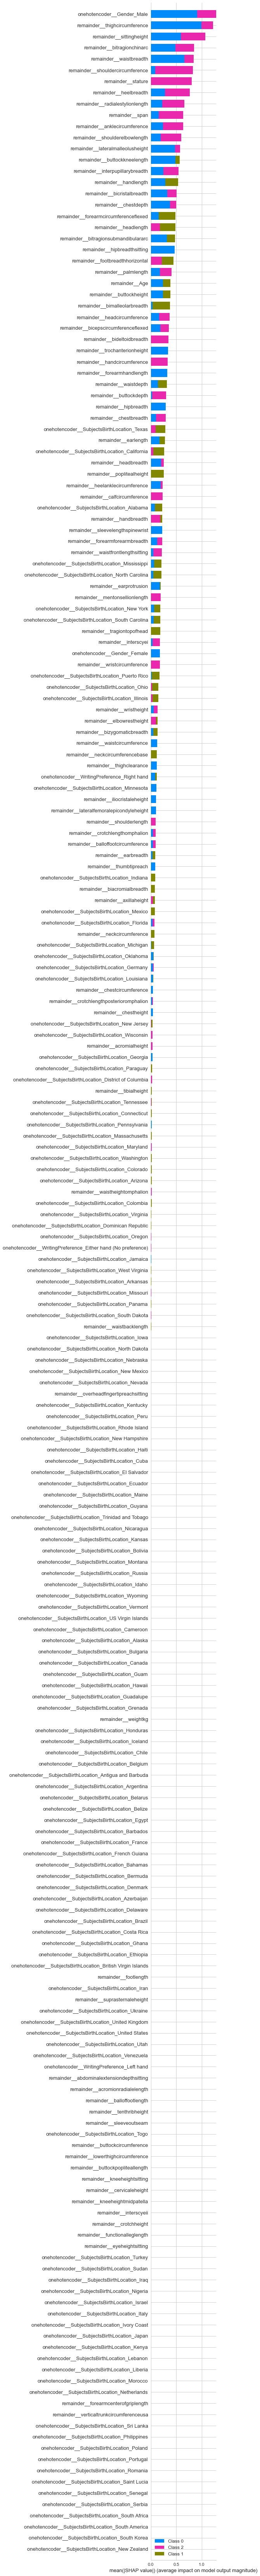

In [152]:
import shap # !pip install shap
explainer = shap.LinearExplainer(model_shap, X_train_trans) # LinearExplainer used for linear models
shap_values = explainer.shap_values(X_test_trans)
shap.summary_plot(shap_values, X_test_trans, max_display=300, feature_names = features, plot_type="bar")

### Train data

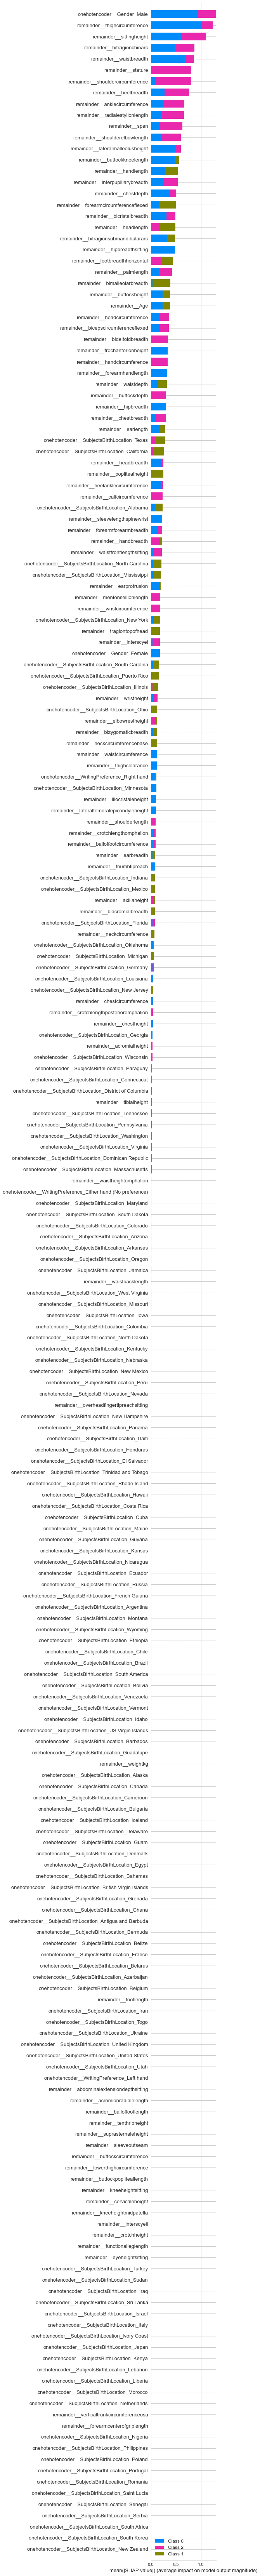

In [153]:
explainer = shap.Explainer(model_shap, X_train_trans)
shap_values = explainer.shap_values(X_train_trans)
shap.summary_plot(shap_values, X_train_trans, max_display=300,feature_names = features)

### Feature selection for Hispanic

In [154]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [155]:
X2 = X[hispanic]
X2.head()

,SubjectsBirthLocation,handlength,forearmcircumferenceflexed,headlength,bitragionsubmandibulararc,footbreadthhorizontal,bimalleolarbreadth,poplitealheight,waistdepth,WritingPreference,tragiontopofhead,bideltoidbreadth,neckcircumferencebase,biacromialbreadth,buttockheight,buttockkneelength,earlength,axillaheight,Age
0,North Dakota,193,299,206,291,101,71,437,240,Right hand,140,493,436,401,882,619,71,1347,41
1,New York,195,289,201,320,98,67,417,225,Left hand,120,479,420,394,870,584,62,1293,35
2,New York,203,357,202,330,103,75,431,255,Left hand,125,544,434,427,901,623,61,1327,42
3,Wisconsin,194,318,199,309,106,73,393,205,Right hand,127,518,446,401,821,560,66,1239,31
4,North Carolina,218,324,197,310,111,80,523,214,Right hand,122,524,430,435,1080,706,56,1478,21


### Modelling with new features

In [156]:
X2 = X[hispanic]
y = data.DODRace

In [157]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [158]:
X2.shape

(5769, 19)

In [159]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [160]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_new), remainder=MinMaxScaler())
operations_shap = [("OneHotEncoder",column_trans_shap),("log", LogisticRegression(class_weight='balanced',max_iter=10000, penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

In [161]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)
# CV sonuçlarına geçtik direk

Test_Set
[[215  15  30]
 [  8 108  20]
 [ 93 129 536]]
              precision    recall  f1-score   support

       Black       0.68      0.83      0.75       260
    Hispanic       0.43      0.79      0.56       136
       White       0.91      0.71      0.80       758

    accuracy                           0.74      1154
   macro avg       0.67      0.78      0.70      1154
weighted avg       0.80      0.74      0.76      1154


Train_Set
[[ 878   47  113]
 [  31  441   71]
 [ 366  512 2156]]
              precision    recall  f1-score   support

       Black       0.69      0.85      0.76      1038
    Hispanic       0.44      0.81      0.57       543
       White       0.92      0.71      0.80      3034

    accuracy                           0.75      4615
   macro avg       0.68      0.79      0.71      4615
weighted avg       0.81      0.75      0.77      4615



### Cross Validation

In [162]:
model = Pipeline(steps=operations_shap)
scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.538
train_f1_Hispanic          0.571
test_precision_Hispanic    0.418
train_precision_Hispanic   0.442
test_recall_Hispanic       0.759
train_recall_Hispanic      0.808
dtype: float64

Performans dropped due to we worked with less feature

### Precision-Recall Curve

### First Approach(yellowbrick.classifier)

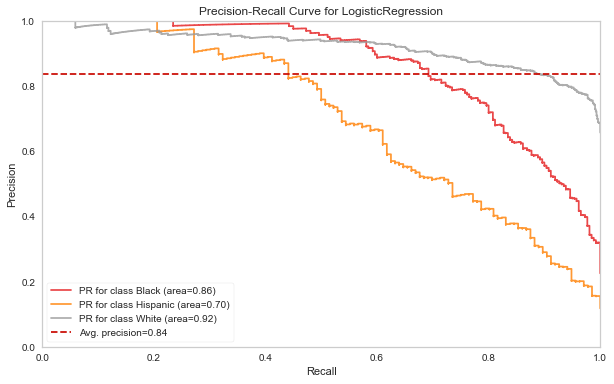

In [164]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations_shap)
viz = PrecisionRecallCurve(model, per_class=True, classes= ["Black", "Hispanic", "White"], cmap="Set1")
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

### Second Approach(scikitplot.metrics)

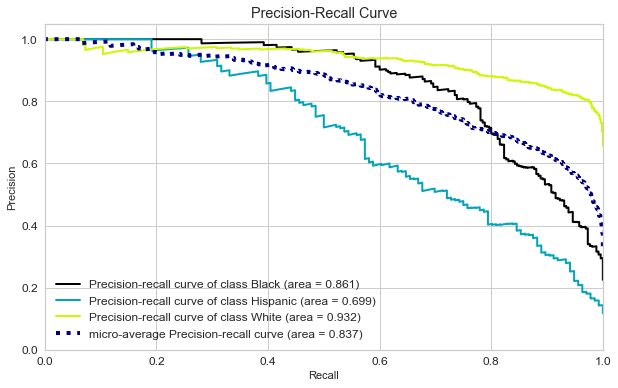

In [165]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
model = Pipeline(steps=operations_shap)
model.fit(X_train2, y_train2)
y_pred_proba = model.predict_proba(X_test2)
plot_precision_recall(y_test2, y_pred_proba)
plt.show()

# THANK YOU FOR YOUR TIME !